## MLP architecture using Python

### Useful functions

In [103]:
import math 
def sigmoid(x):
  return 1/(1+math.exp(-x))

def sigmoid_der(x):
  return x*(1-x)

def binary_crossentropy(pred, label):
  y=label
  p=pred
  epsilon = 1e-8
  ans=-(y * math.log(p+epsilon) + (1 - y) * math.log(1 - p+epsilon)) 
  return ans

def BSE_der(pred, label):
  epsilon = 1e-8
  return (pred - label) / ((pred + epsilon) * (1 - pred + epsilon))

## Forward Layer

In [104]:
def forward_layer(inputs, layer):
    outputs = []
    for neuron in layer:
        z = sum(w * x for w, x in zip(neuron['weights'], inputs)) + neuron['bias']
        a = sigmoid(z)
        outputs.append((z, a))
    return outputs


## Forward Pass with only one hidden neuron

In [105]:
def forward_pass(x, net):
    z1_a1 = forward_layer(x, net['hidden'])
    hidden_outputs = [a for _, a in z1_a1]
    z2_a2 = forward_layer(hidden_outputs, net['output'])
    return z1_a1, hidden_outputs, z2_a2[0]

In [106]:
def backward_pass(x, y, net, z1_a1, hidden_outputs, z2_a2, lr):
    z2, a2 = z2_a2
    dL_dout = BSE_der(a2, y)
    dout_dz2 = sigmoid_der(a2)
    delta2 = dL_dout * dout_dz2
    # Output layer update
    for i in range(len(net['output'][0]['weights'])):
        net['output'][0]['weights'][i] -= lr * delta2 * hidden_outputs[i]
    net['output'][0]['bias'] -= lr * delta2

    # Hidden layer update
    for i, (z1, a1) in enumerate(z1_a1):
        delta1 = delta2 * net['output'][0]['weights'][i] * sigmoid_der(a1)
        for j in range(len(net['hidden'][i]['weights'])):
            net['hidden'][i]['weights'][j] -= lr * delta1 * x[j]
        net['hidden'][i]['bias'] -= lr * delta1

In [107]:
# Predict class
def predict(x, net):
    _, _, (_, a2) = forward_pass(x, net)
    if(a2>=0.5):
        return 1
    else:
        return 0

In [108]:
def accuracy(X, Y, net):
    pred=[predict(x,net) for x in X]
    ans=sum((p == y) for p, y in zip(pred, Y))
    result=ans/len(Y)
    return result    

## Training Loop(MLP)

In [109]:
import random
def train_mlp(X_train, Y_train, net, epochs=100, lr=0.1, batch_size=10):
 losses=[]
 for epoch in range(epochs):
    batch_loss=0
    combined=list(zip(X_train,Y_train))
    random.shuffle(combined)
    for i in range(0,len(combined),batch_size):
        batch = combined[i:i+batch_size]
        for x,y in batch:
          z1_a1, hidden_outputs, z2_a2 = forward_pass(x, net)
          loss = binary_crossentropy(z2_a2[1], y)
          batch_loss += loss
          backward_pass(x, y, net, z1_a1, hidden_outputs, z2_a2, lr)
    avg_loss = batch_loss / len(X_train)
    losses.append(avg_loss)
    print(f"Epoch {epoch} - Loss: {avg_loss:.4f}")
    
 return losses         
        

In [110]:
import matplotlib.pyplot as plt
def plot_loss(losses):
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.show()

# Plot decision boundary

In [111]:
def plot_decision_boundary(net, X, Y):
    x_min, x_max = min(x[0] for x in X) - 0.5, max(x[0] for x in X) + 0.5
    y_min, y_max = min(x[1] for x in X) - 0.5, max(x[1] for x in X) + 0.5

    step = 0.05
    xx, yy, Z = [], [], []
    y_coords = []

    xi = x_min
    while xi <= x_max:
        yi = y_min
        while yi <= y_max:
            pred = predict([xi, yi], net)
            xx.append(xi)
            yy.append(yi)
            Z.append(pred)
            yi += step
        xi += step

    plt.figure(figsize=(8, 6))
    plt.scatter(xx, yy, c=Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=Y, cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary")
    plt.show()

Epoch 0 - Loss: 0.6227
Epoch 1 - Loss: 0.4986
Epoch 2 - Loss: 0.4186
Epoch 3 - Loss: 0.3783
Epoch 4 - Loss: 0.3532
Epoch 5 - Loss: 0.3398
Epoch 6 - Loss: 0.3421
Epoch 7 - Loss: 0.3383
Epoch 8 - Loss: 0.3383
Epoch 9 - Loss: 0.3351
Epoch 10 - Loss: 0.3372
Epoch 11 - Loss: 0.3361
Epoch 12 - Loss: 0.3219
Epoch 13 - Loss: 0.3399
Epoch 14 - Loss: 0.3272
Epoch 15 - Loss: 0.3254
Epoch 16 - Loss: 0.3266
Epoch 17 - Loss: 0.3102
Epoch 18 - Loss: 0.3273
Epoch 19 - Loss: 0.3298
Epoch 20 - Loss: 0.3298
Epoch 21 - Loss: 0.3267
Epoch 22 - Loss: 0.3205
Epoch 23 - Loss: 0.3279
Epoch 24 - Loss: 0.3245
Epoch 25 - Loss: 0.3235
Epoch 26 - Loss: 0.3072
Epoch 27 - Loss: 0.3243
Epoch 28 - Loss: 0.3277
Epoch 29 - Loss: 0.3097
Epoch 30 - Loss: 0.3227
Epoch 31 - Loss: 0.3256
Epoch 32 - Loss: 0.3231
Epoch 33 - Loss: 0.3223
Epoch 34 - Loss: 0.3091
Epoch 35 - Loss: 0.3235
Epoch 36 - Loss: 0.3166
Epoch 37 - Loss: 0.3161
Epoch 38 - Loss: 0.3250
Epoch 39 - Loss: 0.3202
Epoch 40 - Loss: 0.3218
Epoch 41 - Loss: 0.3053
Ep

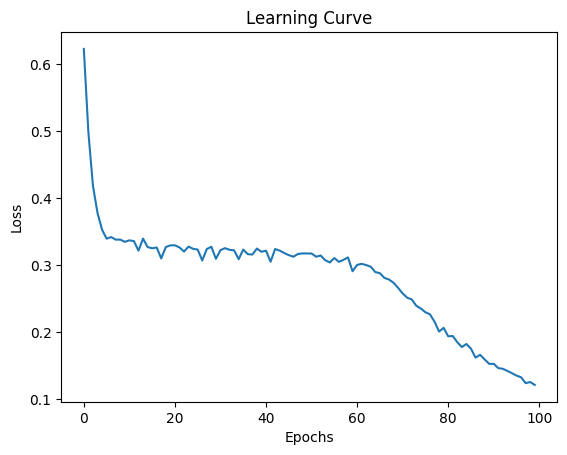

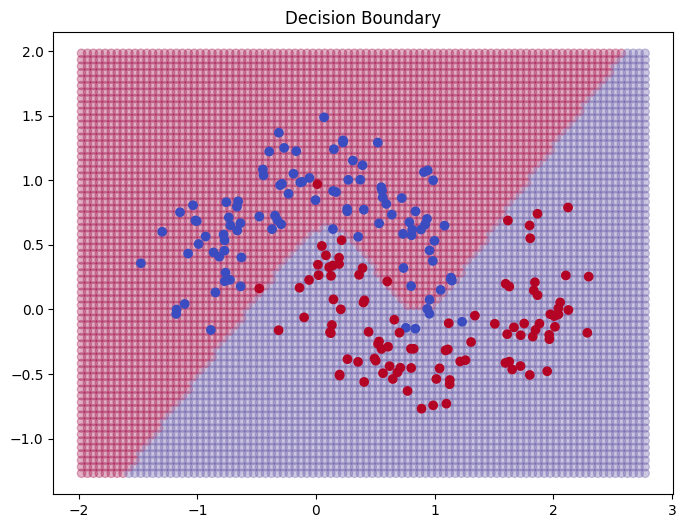

In [ ]:
from sklearn.model_selection import train_test_split
def init_layer(n_input, n_output):
    return [{'weights': [random.uniform(-1, 1) for _ in range(n_input)], 'bias': random.uniform(-1, 1)} for _ in range(n_output)]

from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=200, noise=0.2, random_state=42)
X = [list(map(float, x)) for x in X]
Y = list(Y)

# Train-test split(80% training data and 20% test data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize
input_size = 2
hidden_neurons = 4
net = {
    'hidden': init_layer(input_size, hidden_neurons),
    'output': init_layer(hidden_neurons, 1)
}

# Train
losses = train_mlp(X_train, Y_train, net, epochs=100, lr=0.1, batch_size=10)

# Evaluate
acc = accuracy(X_test, Y_test, net)
print(f"Test Accuracy: {acc * 100:.2f}%")

# Plotting
plot_loss(losses)
plot_decision_boundary(net, X, Y)